In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
zasilacz23=pd.read_csv('zasilaczL23.csv',delimiter=';',decimal=',')

Saving zasilaczL23.csv to zasilaczL23.csv


In [2]:
z23=zasilacz23.drop(['Unnamed: 0','Time'], axis=1)

In [4]:
dane=z23.copy()
dane_y=dane.pop('FTA$SumDefect.L23')
dane_stats = dane.describe()
dane_stats = dane_stats.transpose()

def stand(x):
  return (x - dane_stats['mean']) / dane_stats['std']

dane1=stand(dane)

#druga metoda
def metoda2(x):
  return (x - dane_stats['min']) / (dane_stats['max'] - dane_stats['min'])

dane2=metoda2(dane)

In [5]:
y_bin=dane_y.copy()
n=0
for i,a in enumerate(y_bin):
  if a<30:
    y_bin[i]=0
  elif a>=30:
    y_bin[i]=1

In [6]:
from sklearn import decomposition

In [7]:
pca = decomposition.PCA(n_components=21)
pca.fit(dane1)
pca.explained_variance_ratio_

array([0.29257481, 0.2254547 , 0.11961846, 0.08257314, 0.05567006,
       0.04306179, 0.02759406, 0.02092201, 0.01736859, 0.01693666,
       0.01434825, 0.0136344 , 0.01282485, 0.01130515, 0.00712913,
       0.00668864, 0.00551548, 0.00439121, 0.00294468, 0.00280822,
       0.00218223])

In [9]:
import matplotlib.pyplot as plt

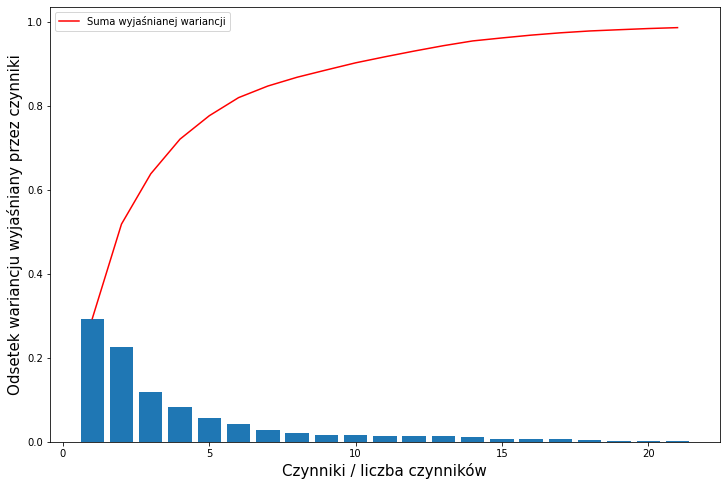

In [10]:
plt.figure(figsize=(12,8))
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Odsetek wariancju wyjaśniany przez czynniki',fontsize=15)
plt.xlabel('Czynniki / liczba czynników',fontsize=15)
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Suma wyjaśnianej wariancji")
plt.legend(loc='upper left')
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.29257481, 0.2254547 , 0.11961846, 0.08257314, 0.05567006,
       0.04306179, 0.02759406, 0.02092201, 0.01736859, 0.01693666,
       0.01434825, 0.0136344 , 0.01282485, 0.01130515, 0.00712913,
       0.00668864, 0.00551548, 0.00439121, 0.00294468, 0.00280822,
       0.00218223])

In [12]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.6376479757408083

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

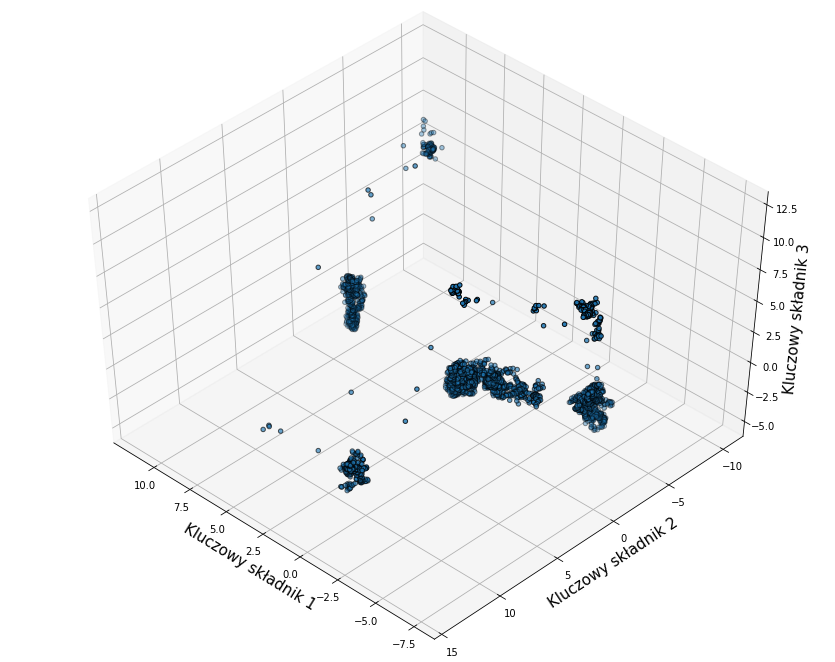

In [15]:
fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           edgecolor='k')

##ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15, rotation=150)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=60)

plt.show()

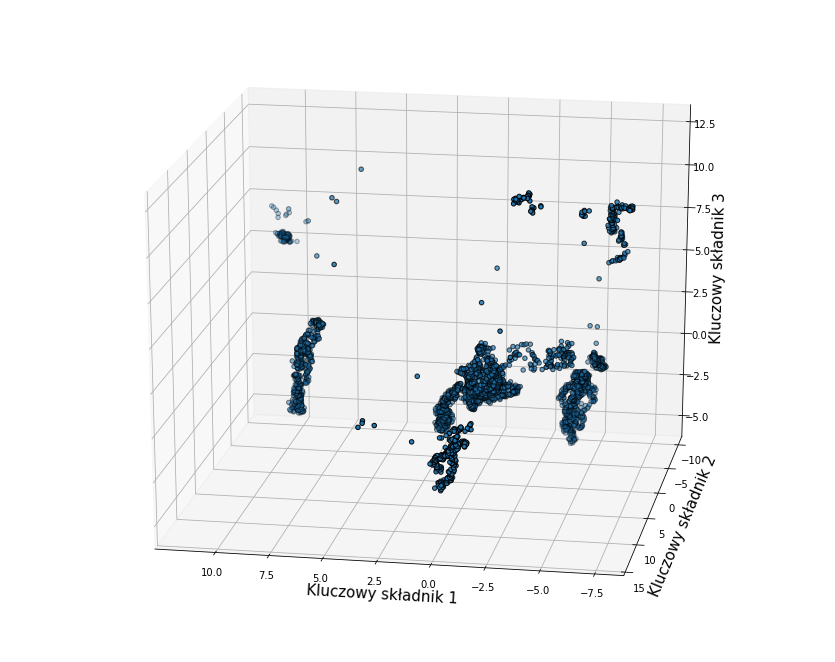

In [16]:
fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)

plt.show()

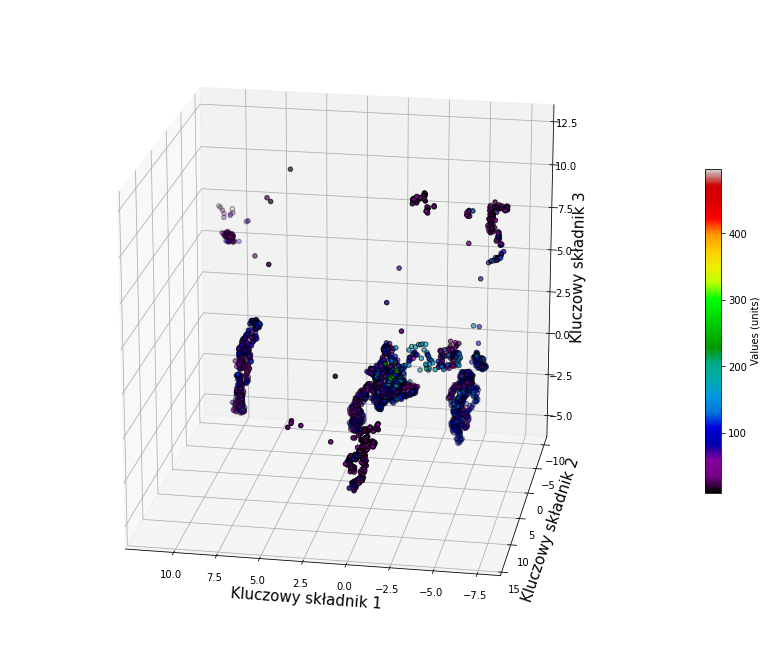

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()
y = dane_y.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='nipy_spectral',
           edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)
cbar=plt.colorbar(axsc,shrink=0.5)
cbar.set_label("Values (units)")
plt.show()

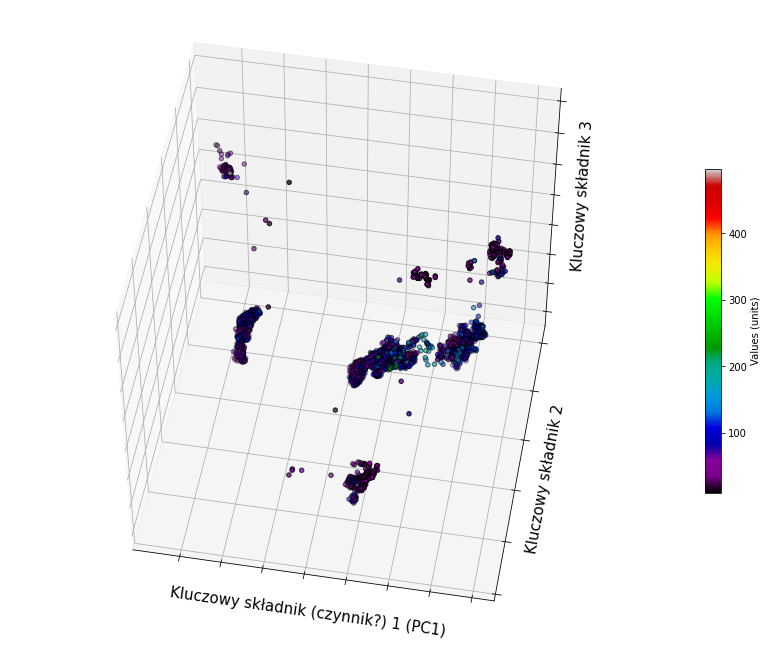

In [18]:
fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()
y = dane_y.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=100)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='nipy_spectral',
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik (czynnik?) 1 (PC1)', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)
cbar=plt.colorbar(axsc,shrink=0.5)
cbar.set_label("Values (units)")
plt.show()

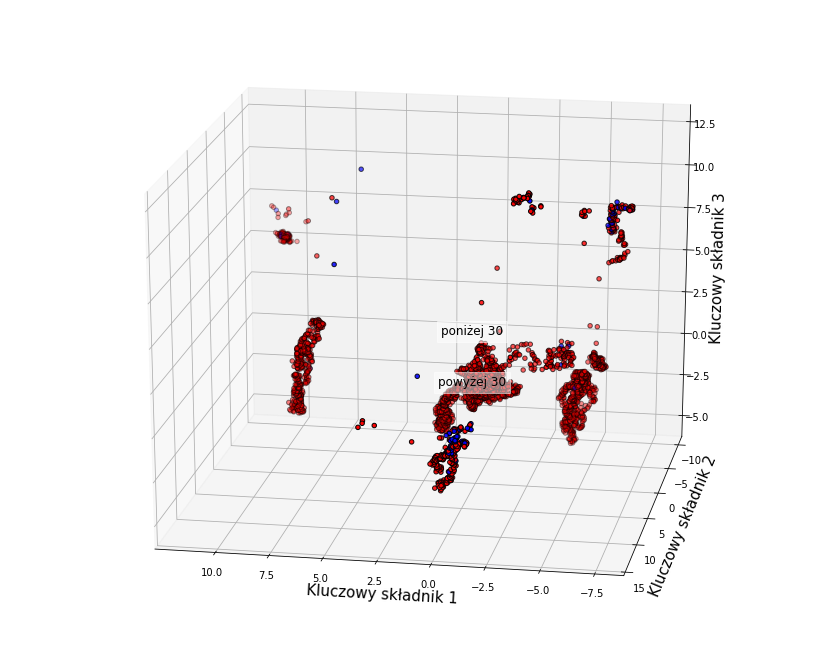

In [19]:
fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()
y = y_bin.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('poniżej 30', 0), ('powyżej 30', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name, size=12,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr',
           edgecolor='k')

##ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)


plt.show()

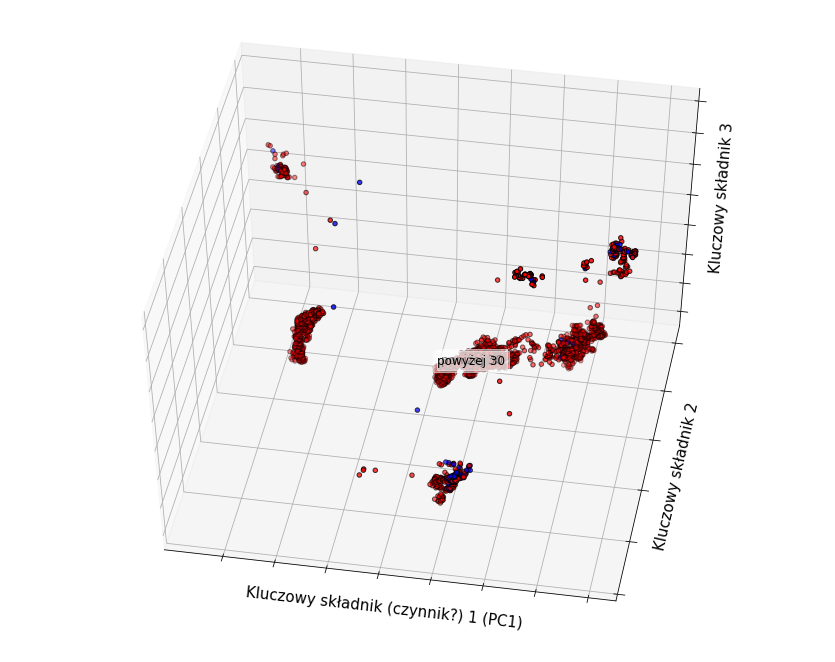

In [20]:
fig = plt.figure(1, figsize=(12, 9))
X = dane1.copy()
y = y_bin.copy()


fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=100)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('poniżej 30', 0), ('powyżej 30', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name, size=12,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr',
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik (czynnik?) 1 (PC1)', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)


plt.show()

In [21]:
from sklearn.cluster import KMeans

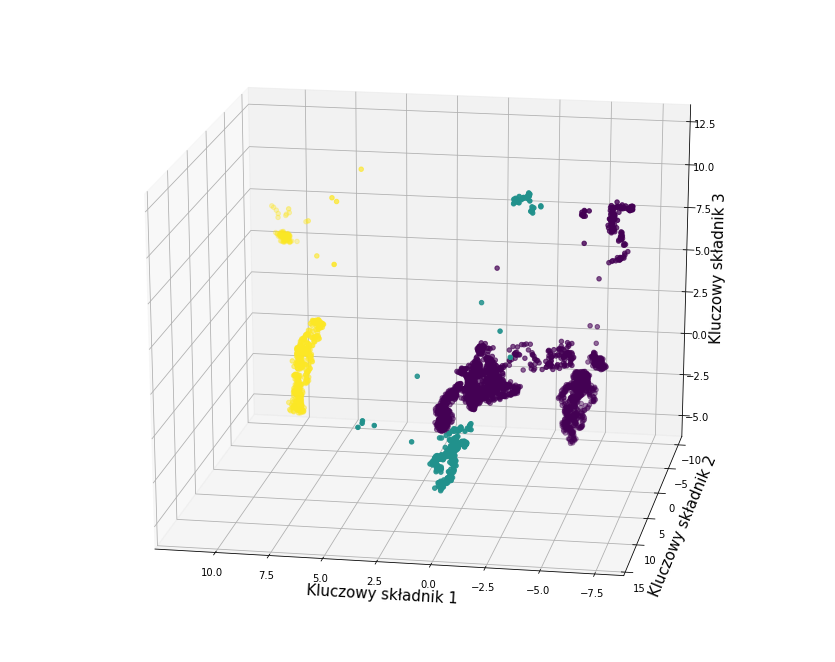

In [22]:
fig = plt.figure(1, figsize=(12, 9))


random_state = 170
Xk = X.copy()


y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(Xk)

fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)




# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=y_pred)

#ax.w_xaxis.set_ticklabels([])
##ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)


plt.show()

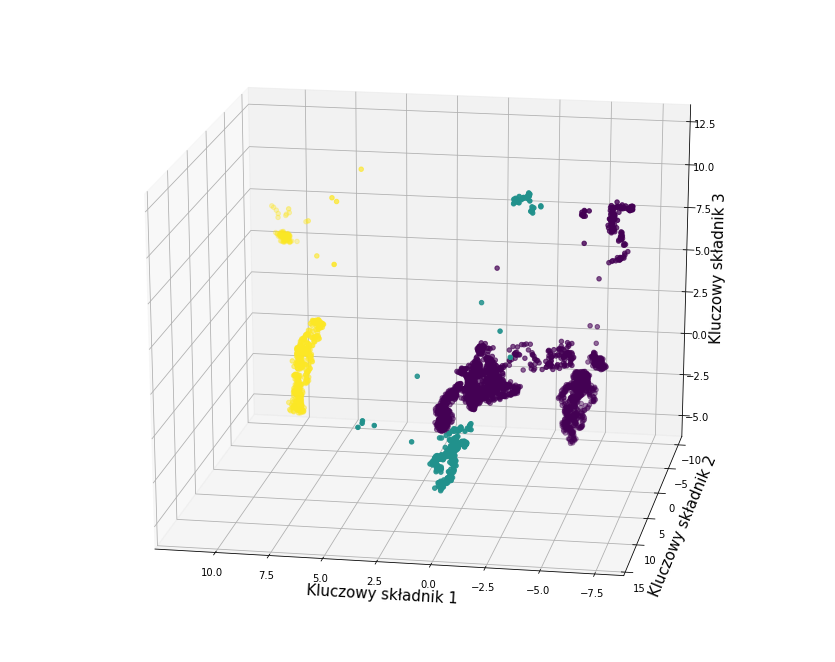

In [23]:
fig = plt.figure(1, figsize=(12, 9))


random_state = 170
Xk = X.copy()


y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(Xk)

fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)




# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [5, 6]).astype(np.float)
axsc=ax.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=y_pred)

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Kluczowy składnik 1', fontsize=15)
ax.set_ylabel('Kluczowy składnik 2', fontsize=15)
ax.set_zlabel('Kluczowy składnik 3', fontsize=15, rotation=0)


plt.show()

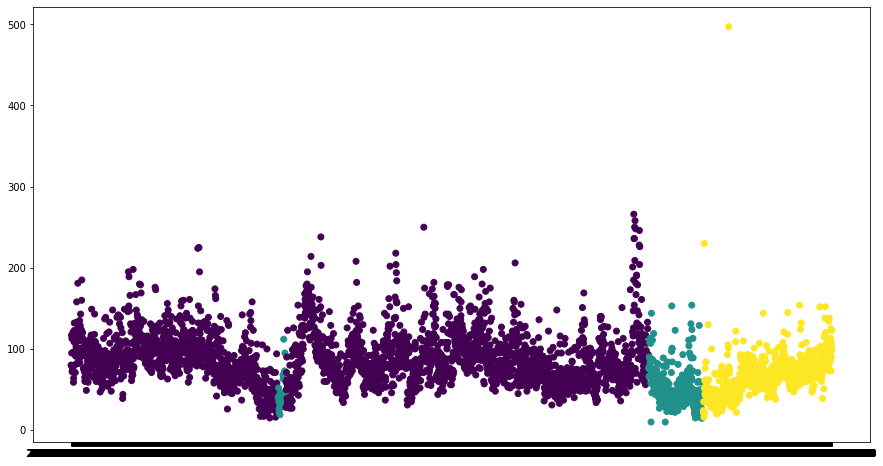

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(x=zasilacz23['Time'],y=zasilacz23['FTA$SumDefect.L23'],c=y_pred)
#s - marker size
plt.show()

In [27]:
X

array([[-4.54336146, -3.18458718, -1.70309972],
       [-4.53636876, -2.96442946, -1.74648441],
       [-4.62661887, -3.139834  , -1.73905375],
       ...,
       [ 7.17399206,  1.49472614,  3.02755075],
       [ 7.15814317,  1.35360079,  3.07933468],
       [ 7.30040722,  1.54059609,  3.01674185]])

In [28]:
df = pd.DataFrame(pca.components_, columns=list(dane1.columns))

In [29]:
df

,J23.R1X.TOP.TP.TC.PV,J23.R1X.BTM.TP.TC.PV,J23.R1X.TOP.TP.SP,J23.R1L.CB.PR.PV,J23.R1R.CB.PR.PV,J23.R1L.CV.PV,J23.R1R.CV.PV,J23.R1.CW.PV,Font,FBTM..TP3,J23.R2C.TOP.TP.TC.PV,J23.R2C.BTM.TP.TC.PV,J23.R2C.TOP.TP.SP,J23.R2L.CB.PR.PV,J23.R2R.CB.PR.PV,J23.R2L.CV.PV,J23.R2R.CV.PV,J23.R2.CW.PV,J23.A1C.TOP.TP.TC.PV,J23.A1C.BTM.TP.TC.PV,J23.A1C.TOP.TP.SP,J23.A1L.CB.PR.PV,J23.A1R.CB.PR.PV,J23.A1L.CV.PV,J23.A1R.CV.PV,J23.BC.TOP.TP.TC.PV,J23.BC.BTM.TP.TC.PV,J23.BC.TOP.TP.SP,J23.BL.CB.PR.PV,J23.BR.CB.PR.PV,J23.BL.CV.PV,J23.BR.CV.PV,J23.B.CW.PV,J23.MC.TOP.TP.TC.PV,J23.MC.BTM.TP.TC.PV,J23.MC.TOP.TP.SP,J23.ML.CB.PR.PV,J23.MR.CB.PR.PV,J23.ML.CV.PV,J23.MR.CV.PV,J23.M.CW.PV,J23.FL.TOP.TP.TC.PV,J23.FL.BTM.TP.TC.PV,J23.FC.TOP.TP.TC.PV,J23.FC.BTM.TP.TC.PV,J23.FR.TOP.TP.TC.PV,J23.FR.BTM.TP.TC.PV,J23.FC.TOP.TP.SP,J23.FL.CB.PR.PV,J23.FR.CB.PR.PV,J23.FL.CV.PV,J23.FR.CV.PV,J2F.FONT.TP.TC.PV,TC.FH3_FR.MID.TP.TC.PV,TC.FH3_FC.MID.TP.TC.PV,TC.FH3_FL.MID.TP.TC.PV,J23.M1.CW.TP.PV,J23.M1.CW.PR.PV,J23.M1.CW.CV.PV,pull,FN_BTM_TP3_TC.PV,J2F.FN.PR.PV,J2F.GL.LEV.PV,FN_TH_SW_TP_TC.PV,Z2.KW,Z3.KW,FN_CH1.SPD.PV,FN_CH2.SPD.PV,FN_STK.CV.PV,Temperature,Pressure,Humidity
0,-0.007054,0.077414,-0.184828,-0.035641,-0.035107,-0.046060,-0.042331,0.193297,0.086164,-0.035089,-0.177377,0.040696,-0.179006,0.146989,0.159566,0.105065,0.129158,0.180312,-0.179746,-0.183057,-0.181018,-0.194924,-0.181696,-0.196397,-0.173089,-0.178820,-0.180053,-0.179342,0.110348,0.001208,0.095439,0.142982,0.196286,-0.054537,-0.153131,-0.057821,0.125273,0.008682,0.102385,0.137267,0.114661,0.053172,0.004429,-0.144550,-0.110550,0.048939,-0.022414,-0.134244,0.105833,0.105928,0.102263,0.098972,0.086164,0.044414,-0.119583,0.054612,-0.062004,-0.043693,-0.008379,0.180264,-0.035089,0.021920,-0.007182,0.048485,-0.109610,-0.075774,0.031814,0.032258,0.189012,-0.075835,-0.016636,-0.041431
1,-0.062566,-0.041693,-0.087334,0.064833,0.065239,0.066261,0.065891,0.015061,-0.064928,-0.131778,0.085124,-0.104368,0.085605,0.121958,0.106372,0.116278,0.120356,-0.059778,0.080733,0.050494,0.078927,0.061412,0.081526,0.054936,0.088096,0.087313,0.090077,0.088761,0.197378,0.211600,0.197041,0.117166,0.007717,0.008311,0.135234,0.008655,0.182414,0.211707,0.209828,0.138010,0.184558,0.196590,0.229911,0.163353,0.133529,0.213893,0.225543,0.162937,-0.051190,-0.051370,-0.050844,-0.048806,-0.064928,0.224066,0.120963,0.228034,-0.128741,-0.083164,-0.072711,0.061530,-0.131778,0.009254,0.001789,-0.078718,-0.057192,-0.038198,0.012902,0.011210,0.067660,-0.126742,0.028218,0.035002
2,-0.265023,-0.273565,0.023324,0.262068,0.262294,0.260226,0.260655,-0.093518,-0.212883,-0.119902,-0.066337,-0.056642,-0.065258,0.035100,0.046371,0.070491,0.099037,0.040443,-0.071201,-0.097607,-0.063526,-0.024431,-0.004560,-0.031988,-0.002036,-0.099349,-0.107678,-0.095972,-0.059448,-0.086153,-0.073069,-0.043673,0.010005,-0.032291,-0.122223,-0.025641,-0.035285,-0.085542,-0.052902,-0.048818,-0.087024,-0.071124,-0.100556,-0.024490,-0.115188,0.067872,-0.066079,-0.114875,-0.152424,-0.152730,-0.157979,-0.159829,-0.212883,-0.012067,-0.095831,-0.069661,-0.181294,-0.128623,-0.104947,-0.097886,-0.119902,-0.051825,-0.002755,-0.176626,-0.050765,-0.012922,-0.016328,-0.017095,-0.069094,-0.157551,0.000297,0.122416


In [30]:
X[:,0:2]

array([[-4.54336146, -3.18458718],
       [-4.53636876, -2.96442946],
       [-4.62661887, -3.139834  ],
       ...,
       [ 7.17399206,  1.49472614],
       [ 7.15814317,  1.35360079],
       [ 7.30040722,  1.54059609]])

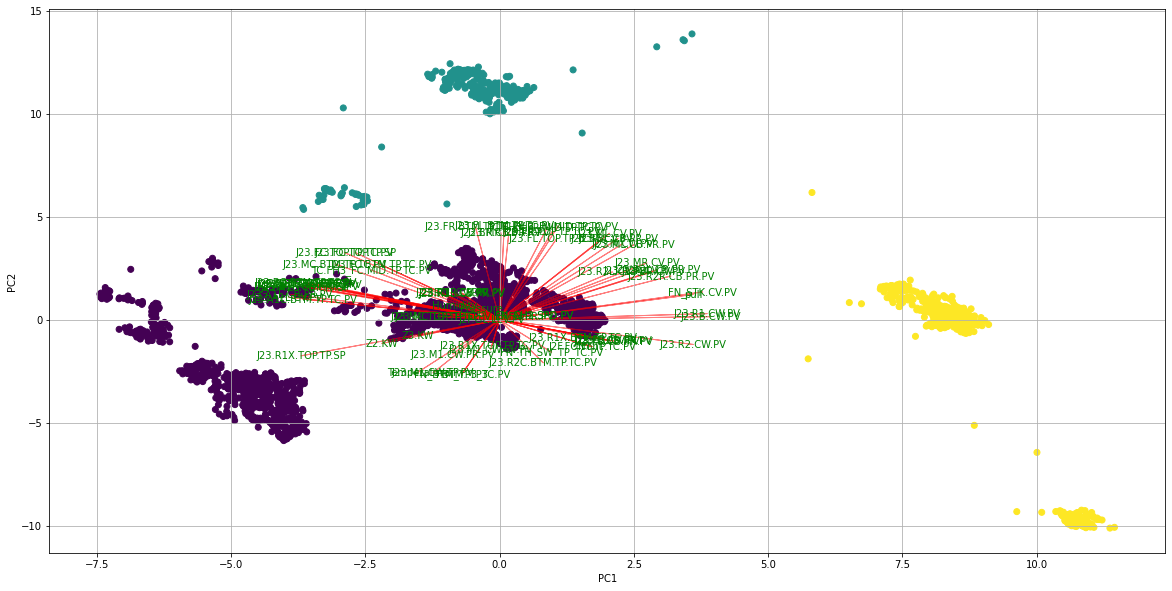

In [31]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    plt.scatter(xs ,ys, c = y_pred) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 20, coeff[i,1] * 20, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 20, coeff[i,1] * 20, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(20,10))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X[:,0:2], np.transpose(pca.components_[0:2, :]),dane1.columns) 
plt.show()

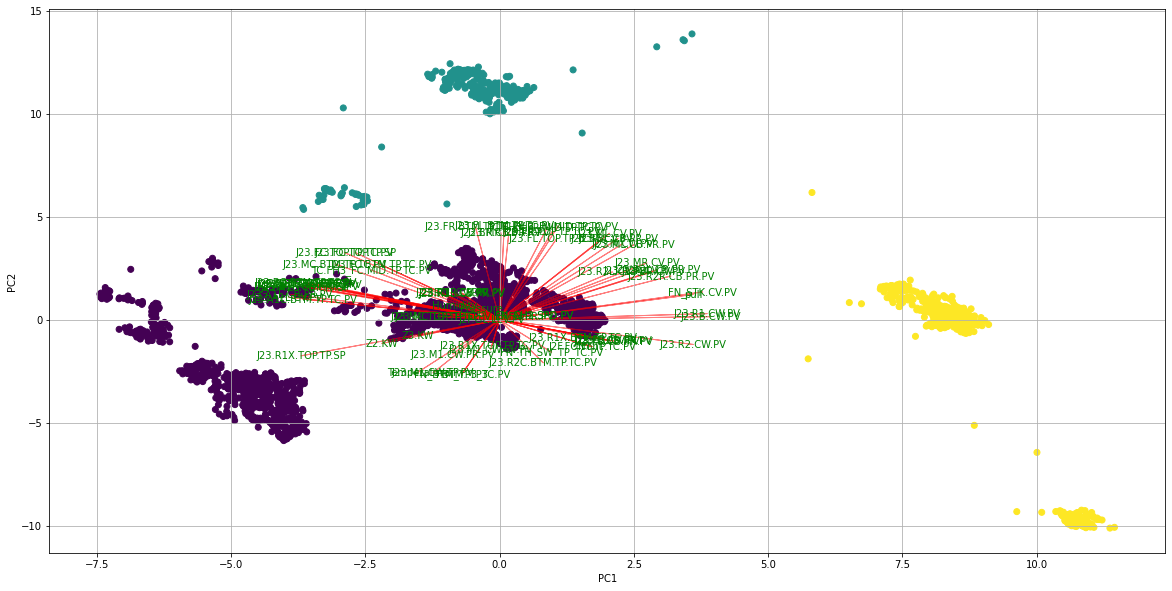

In [32]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    plt.scatter(xs ,ys, c = y_pred) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 20, coeff[i,1] * 20, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 20, coeff[i,1] * 20, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(20,10))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X[:,0:2], np.transpose(pca.components_[0:2, :]),dane1.columns) 
plt.show()

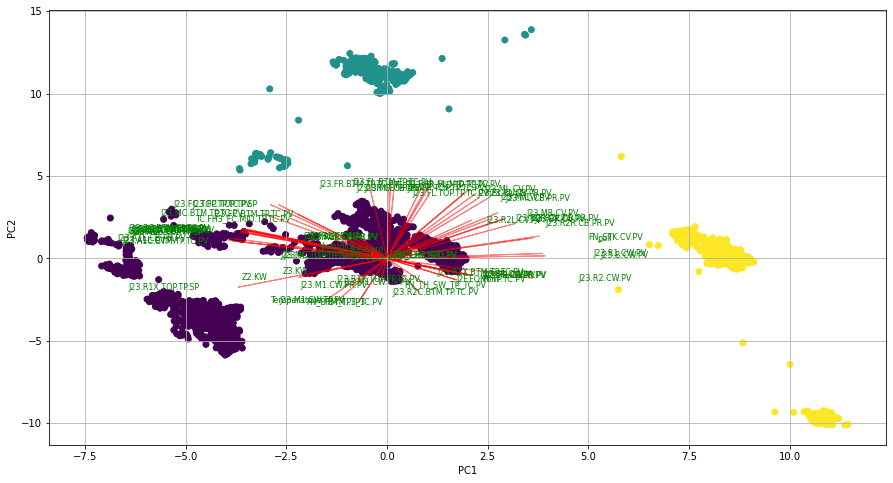

In [33]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    plt.scatter(xs ,ys, c = y_pred) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 30, coeff[i,1] * 30, "Var"+str(i+1), size=1,color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 30, coeff[i,1] * 20, labels[i],size=8 ,color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(15,8))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X[:,0:2], np.transpose(pca.components_[0:2, :]),dane1.columns) 
plt.show()

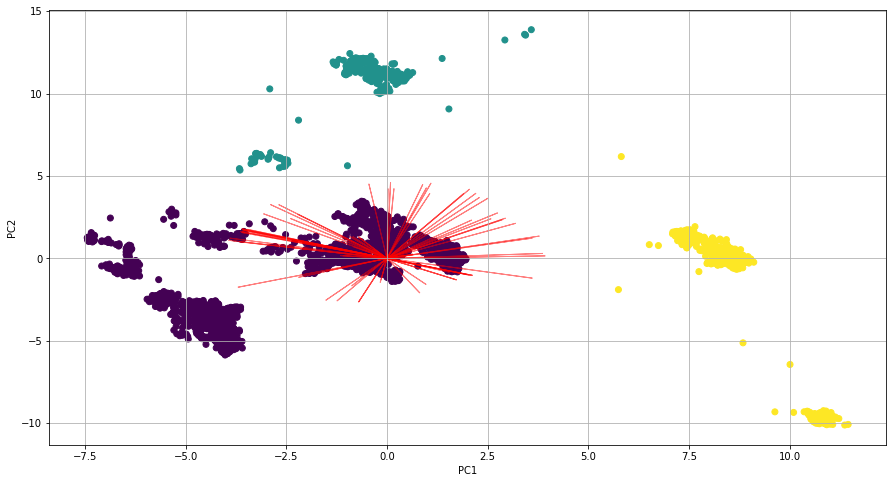

In [34]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    plt.scatter(xs ,ys, c = y_pred) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r',alpha = 0.5)
        

plt.figure(figsize=(15,8))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X[:,0:2], np.transpose(pca.components_[0:2, :]),dane1.columns) 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


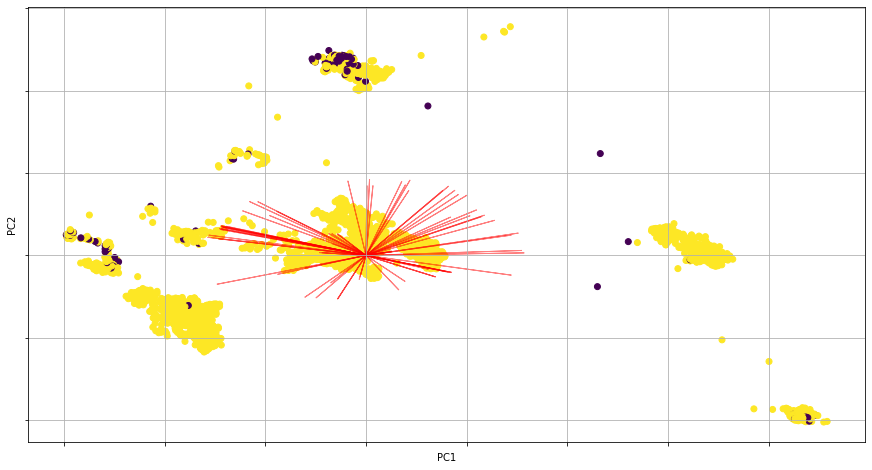

In [35]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    plt.scatter(xs ,ys, c = y_bin) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r',alpha = 0.5)
       

plt.figure(figsize=(15,8))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X[:,0:2], np.transpose(pca.components_[0:2, :]),dane1.columns) 
ax1=plt.axes()

ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
plt.show()

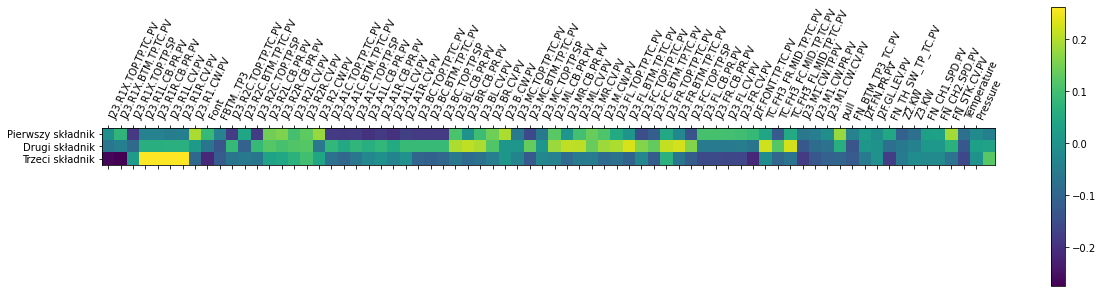

In [36]:
plt.figure(figsize=(20,5))

plt.matshow(pca.components_,cmap='viridis',fignum=1)
plt.yticks([0,1,2],['Pierwszy składnik','Drugi składnik','Trzeci składnik'],fontsize=10)
plt.colorbar()
plt.xticks(range(71),list(dane1.columns.values),rotation=65,ha='left')
plt.show()

In [37]:
pd.DataFrame((list(dane1.columns.values),list(pca.components_[0])))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,J23.R1X.TOP.TP.TC.PV,J23.R1X.BTM.TP.TC.PV,J23.R1X.TOP.TP.SP,J23.R1L.CB.PR.PV,J23.R1R.CB.PR.PV,J23.R1L.CV.PV,J23.R1R.CV.PV,J23.R1.CW.PV,Font,FBTM..TP3,J23.R2C.TOP.TP.TC.PV,J23.R2C.BTM.TP.TC.PV,J23.R2C.TOP.TP.SP,J23.R2L.CB.PR.PV,J23.R2R.CB.PR.PV,J23.R2L.CV.PV,J23.R2R.CV.PV,J23.R2.CW.PV,J23.A1C.TOP.TP.TC.PV,J23.A1C.BTM.TP.TC.PV,J23.A1C.TOP.TP.SP,J23.A1L.CB.PR.PV,J23.A1R.CB.PR.PV,J23.A1L.CV.PV,J23.A1R.CV.PV,J23.BC.TOP.TP.TC.PV,J23.BC.BTM.TP.TC.PV,J23.BC.TOP.TP.SP,J23.BL.CB.PR.PV,J23.BR.CB.PR.PV,J23.BL.CV.PV,J23.BR.CV.PV,J23.B.CW.PV,J23.MC.TOP.TP.TC.PV,J23.MC.BTM.TP.TC.PV,J23.MC.TOP.TP.SP,J23.ML.CB.PR.PV,J23.MR.CB.PR.PV,J23.ML.CV.PV,J23.MR.CV.PV,J23.M.CW.PV,J23.FL.TOP.TP.TC.PV,J23.FL.BTM.TP.TC.PV,J23.FC.TOP.TP.TC.PV,J23.FC.BTM.TP.TC.PV,J23.FR.TOP.TP.TC.PV,J23.FR.BTM.TP.TC.PV,J23.FC.TOP.TP.SP,J23.FL.CB.PR.PV,J23.FR.CB.PR.PV,J23.FL.CV.PV,J23.FR.CV.PV,J2F.FONT.TP.TC.PV,TC.FH3_FR.MID.TP.TC.PV,TC.FH3_FC.MID.TP.TC.PV,TC.FH3_FL.MID.TP.TC.PV,J23.M1.CW.TP.PV,J23.M1.CW.PR.PV,J23.M1.CW.CV.PV,pull,FN_BTM_TP3_TC.PV,J2F.FN.PR.PV,J2F.GL.LEV.PV,FN_TH_SW_TP_TC.PV,Z2.KW,Z3.KW,FN_CH1.SPD.PV,FN_CH2.SPD.PV,FN_STK.CV.PV,Temperature,Pressure,Humidity
1,-0.00705352,0.0774137,-0.184828,-0.0356414,-0.035107,-0.0460599,-0.0423307,0.193297,0.0861638,-0.0350885,-0.177377,0.0406961,-0.179006,0.146989,0.159566,0.105065,0.129158,0.180312,-0.179746,-0.183057,-0.181018,-0.194924,-0.181696,-0.196397,-0.173089,-0.17882,-0.180053,-0.179342,0.110348,0.00120841,0.0954391,0.142982,0.196286,-0.0545371,-0.153131,-0.0578208,0.125273,0.00868207,0.102385,0.137267,0.114661,0.0531715,0.00442938,-0.14455,-0.11055,0.0489389,-0.0224143,-0.134244,0.105833,0.105928,0.102263,0.0989719,0.0861638,0.0444137,-0.119583,0.0546124,-0.0620038,-0.0436931,-0.00837872,0.180264,-0.0350885,0.0219202,-0.00718193,0.0484849,-0.10961,-0.0757743,0.0318142,0.0322579,0.189012,-0.0758351,-0.0166362,-0.0414313


In [ ]:
#d=pd.DataFrame(dane1.columns.values,pca.components_[0],columns=['val','col'])

In [39]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
import graphviz

In [41]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit, KFold
import graphviz 

In [42]:
kfcv = KFold(n_splits=5,shuffle=True)

In [43]:
cv_regr = tree.DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(cv_regr, dane, dane_y,scoring='neg_root_mean_squared_error', cv=kfcv) 

In [44]:
scores

array([-32.39925805, -25.35970082, -26.10999892, -27.78322677,
       -30.10143597])

In [45]:
scores.mean()

-28.350724105527064

In [46]:
import graphviz
i=1
for train,test in kfcv.split(dane): 
    dectreecv = tree.DecisionTreeRegressor(max_depth=4) 
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train])
    dot_data=tree.export_graphviz(dectreecv, feature_names=list(dane.columns.values), filled=True)  
    graph=graphviz.Source(dot_data)
    graph.format = 'png'
    nazwa='drzewo_kfold'+str(i)  
    graph.render(nazwa,view=True)
    i=i+1

In [118]:
pip install eli5

     |████████████████████████████████| 112kB 5.8MB/s 


In [120]:
from eli5 import transform_feature_names

In [119]:
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [125]:
kfcv = KFold(n_splits=5,shuffle=True)
i=1
perms=[]
rmse_list=[] # stworzenie listy wartości błędów
# pętla instrukcji dla poszczególnych podziałów danych:
for train,test in kfcv.split(dane): 
    dectreecv = tree.DecisionTreeRegressor(max_depth=4) # inicjalizacja drzewa
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train]) # dopasowanie drzewa do danych
    # tworzenie i zapisywanie wizualizacji drzewa:
    #dot_data=tree.export_graphviz(dectreecv, feature_names=list(dane.columns.values), filled=True)  
    #graph=graphviz.Source(dot_data)
    #graph.format = 'png'
    #nazwa='drzewo_kfold'+str(i)  
    #graph.render(nazwa,view=True)
    #i=i+1
    perm = PermutationImportance(dectreecv, random_state=1, scoring='neg_root_mean_squared_error').fit(dane.iloc[test], dane_y.iloc[test])
    perms.append(perm)
    
    test_pred=dectreecv.predict(dane.iloc[test]) # generowanie predykcji dla zbioru testowego
    test_mse=mean_squared_error(dane_y.iloc[test],test_pred) # pomiar błędu (porównanie z wartościami rzeczywistymi)
    rmse=np.sqrt(test_mse)
    print("Błąd mse:",test_mse)  # wyświetlanie wartości błędu
    print("rmse: ",rmse)         
    rmse_list.append(rmse) 
print("Średni błąd RMSE: ", np.mean(rmse_list)) # wyświetlanie średniego błędu

Błąd mse: 905.1124574224951
rmse:  30.085086960527388
Błąd mse: 664.2221821180857
rmse:  25.772508262062615
Błąd mse: 790.5315620842836
rmse:  28.116393120104924
Błąd mse: 943.7463953951313
rmse:  30.72045565083844
Błąd mse: 1147.3267202874324
rmse:  33.872211623799124
Średni błąd RMSE:  29.713331123466496


In [126]:
eli5.show_weights(perms[3], feature_names = X_test.columns.tolist())

Weight,Feature
3.4447 ± 2.3159,J23.R1X.TOP.TP.TC.PV
3.0257 ± 0.7393,J23.BL.CV.PV
1.6209 ± 0.6305,J23.R2R.CV.PV
1.1732 ± 0.1119,J2F.FONT.TP.TC.PV
1.1103 ± 0.1550,J23.A1L.CB.PR.PV
0.5948 ± 0.1249,J23.BR.CV.PV
0.3842 ± 0.3776,J23.FR.BTM.TP.TC.PV
0.3683 ± 0.1898,J23.FC.TOP.TP.TC.PV
0.1304 ± 0.2108,Pressure
0.0125 ± 0.0242,J23.R2R.CB.PR.PV


In [127]:
eli5.show_weights(perms[4], feature_names = X_test.columns.tolist())

Weight,Feature
7.5177 ± 2.7233,J23.MR.CV.PV
3.6038 ± 0.5444,J23.BL.CV.PV
2.3579 ± 1.3013,J23.R1X.TOP.TP.TC.PV
2.3034 ± 0.1755,J23.R1R.CB.PR.PV
2.2026 ± 0.7183,Z3.KW
1.9228 ± 0.8866,Pressure
1.0951 ± 0.3555,pull
0.2570 ± 0.1563,FN_TH_SW_TP_TC.PV
0.0577 ± 0.0000,J23.R2L.CV.PV
0.0160 ± 0.0223,TC.FH3_FR.MID.TP.TC.PV


In [62]:
X_tren = z23.sample(frac=0.8,random_state=20) 
X_test = z23.drop(X_tren.index)

y_tren = X_tren.pop('FTA$SumDefect.L23')
y_test = X_test.pop('FTA$SumDefect.L23')

In [96]:
y_tren_q=pd.qcut(y_tren, q=4,labels=[0,1,2,3])
y_test_q=pd.qcut(y_test, q=4,labels=[0,1,2,3])
#0,1 wg mediany
y_bin_tren=y_tren_q.replace([0,1],0)
y_bin_tren=y_bin_tren.replace([2,3],1)
y_bin_test=y_test_q.replace([0,1],0)
y_bin_test=y_bin_test.replace([2,3],1)

In [58]:
dataset_labels_q=pd.qcut(dane_y, q=4,labels=[0,1,2,3])

#0,1 wg mediany
dataset_labels_binary=dataset_labels_q.replace([0,1],0)
dataset_labels_binary=dataset_labels_binary.replace([2,3],1)

In [59]:
dataset_labels_binary

0       1
1       1
2       1
3       1
4       1
       ..
3853    0
3854    1
3855    1
3856    1
3857    1
Name: FTA$SumDefect.L23, Length: 3858, dtype: category
Categories (2, int64): [0 < 1]

In [56]:
from sklearn.metrics import mean_squared_error

In [63]:
treereg = tree.DecisionTreeRegressor(max_depth=4)
treereg.fit(X_tren, y_tren)
train_pred=treereg.predict(X_tren)
train_mse = mean_squared_error(y_tren, train_pred)
test_pred = treereg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

In [55]:
zas_x=z23.copy()
zas_labels=zas_x.pop("FTA$SumDefect.L23")

In [64]:
treereg4 = tree.DecisionTreeRegressor(max_depth=4)
treereg4.fit(X_tren, y_tren)
zas_pred4=treereg4.predict(zas_x)

In [65]:
treereg5 = tree.DecisionTreeRegressor(max_depth=5)
treereg5.fit(X_tren, y_tren)
zas_pred5=treereg5.predict(zas_x)

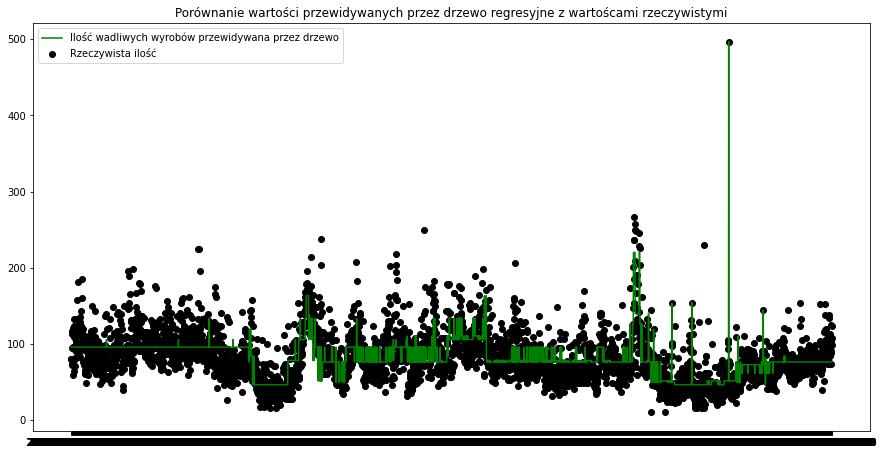

In [66]:
plt.figure(figsize=(15,7.5))
plt.scatter(zasilacz23['Time'], zasilacz23['FTA$SumDefect.L23'], c='k', label='Rzeczywista ilość')
plt.plot(zasilacz23['Time'], zas_pred5, c='g', label='Ilość wadliwych wyrobów przewidywana przez drzewo')

plt.axis('tight')
plt.legend()
plt.title("Porównanie wartości przewidywanych przez drzewo regresyjne z wartoścami rzeczywistymi")
plt.show()

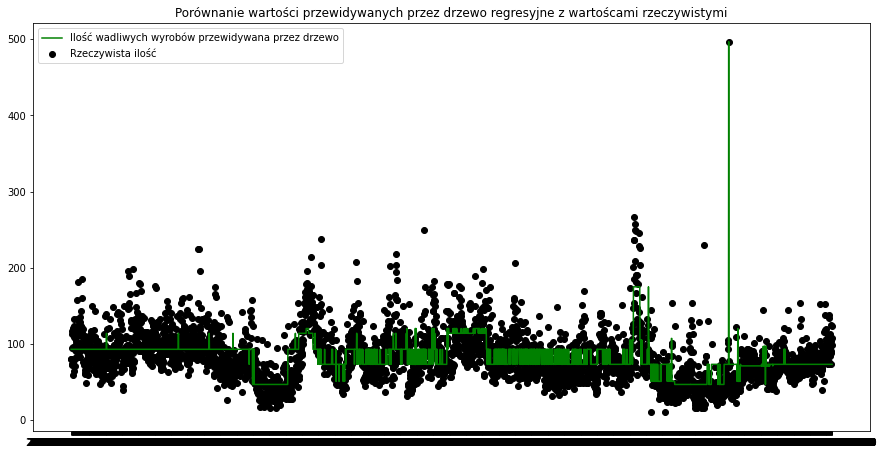

In [67]:
plt.figure(figsize=(15,7.5))
plt.scatter(zasilacz23['Time'], zasilacz23['FTA$SumDefect.L23'], c='k', label='Rzeczywista ilość')
plt.plot(zasilacz23['Time'], zas_pred4, c='g', label='Ilość wadliwych wyrobów przewidywana przez drzewo')

plt.axis('tight')
plt.legend()
plt.title("Porównanie wartości przewidywanych przez drzewo regresyjne z wartoścami rzeczywistymi")
plt.show()

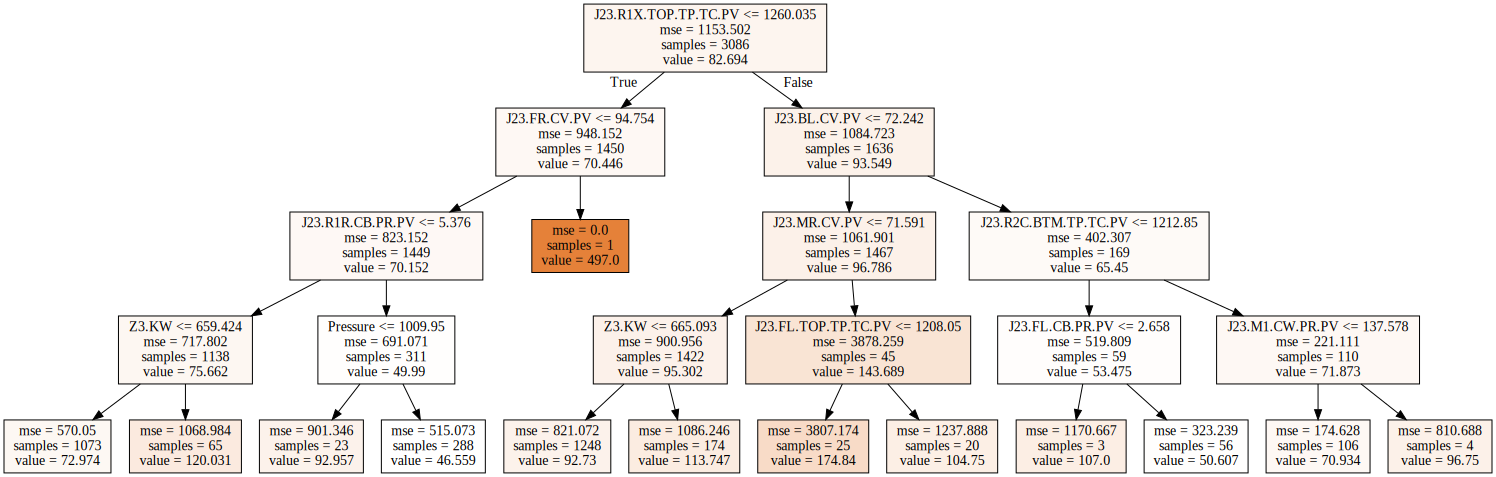

In [68]:
dot_data3 = tree.export_graphviz(treereg, feature_names=list(X_tren.columns.values), filled=True)  
graph = graphviz.Source(dot_data3)  
graph 

In [69]:
treereg1 = tree.DecisionTreeRegressor(max_depth=4)
treereg1.fit(dane, dane_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

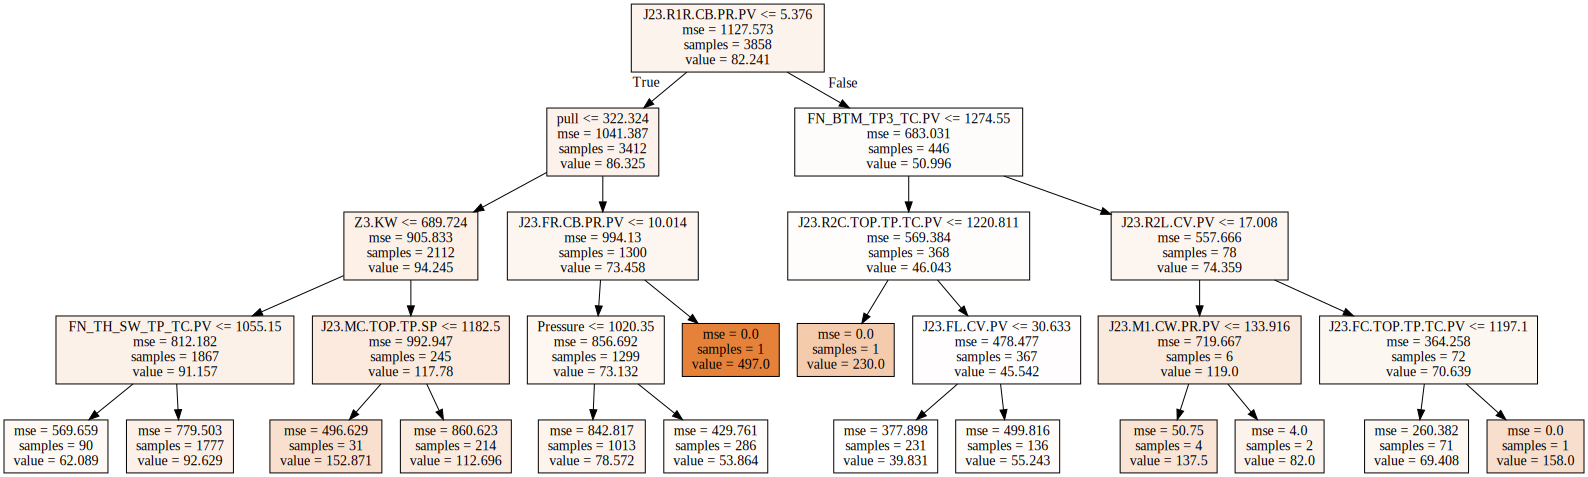

In [70]:
dot_data3 = tree.export_graphviz(treereg1, feature_names=list(dane.columns.values), filled=True)  
graph = graphviz.Source(dot_data3)  
graph

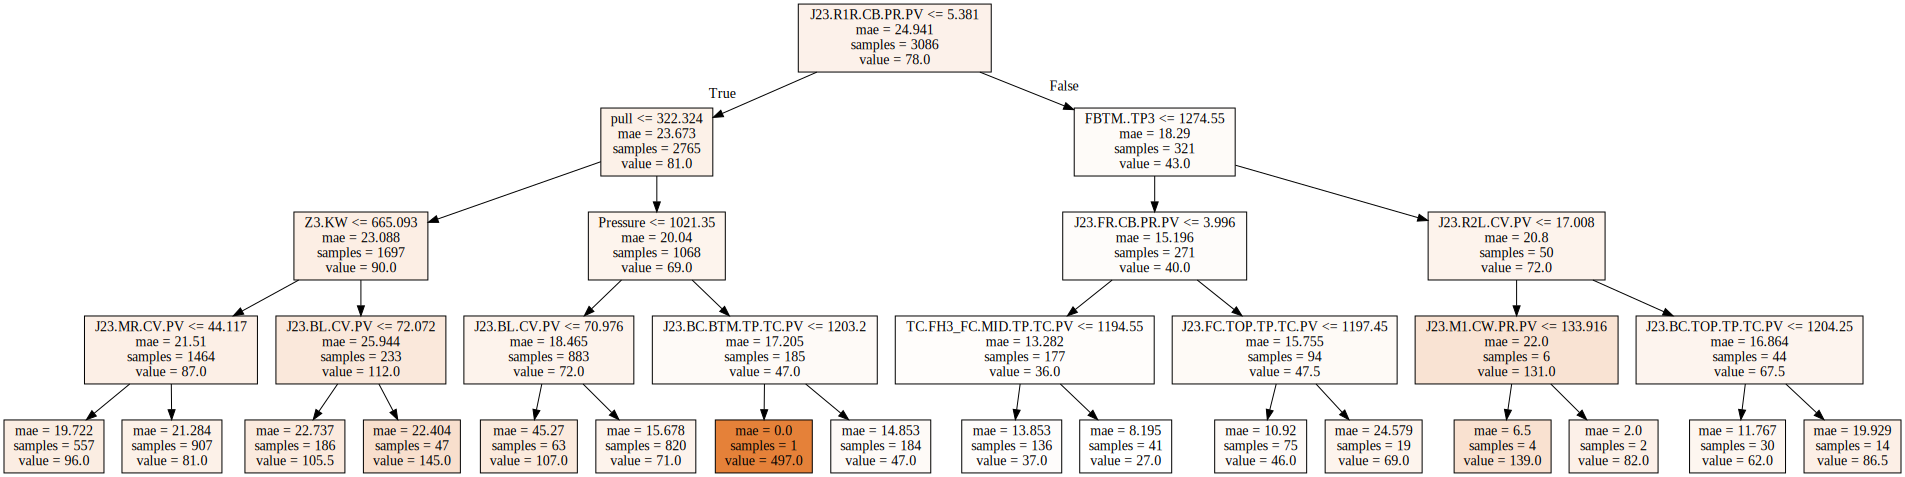

In [71]:
dectreereg=tree.DecisionTreeRegressor(criterion='mae',max_depth=4)
dectreereg.fit(X_tren, y_tren)
train_pred=dectreereg.predict(X_tren)
train_mse = mean_squared_error(y_tren, train_pred)
test_pred = dectreereg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)


dot_data3 = tree.export_graphviz(dectreereg, feature_names=list(X_tren.columns.values), filled=True)  
graph = graphviz.Source(dot_data3)  
graph 

In [72]:
np.sqrt(train_mse)

26.731732971030485

In [73]:
np.sqrt(test_mse)

25.72955574548662

In [74]:
treereg.feature_importances_

array([0.30790727, 0.        , 0.        , 0.        , 0.12080099,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00975541, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11167784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07664474,
       0.        , 0.04096462, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00679587, 0.        ,
       0.        , 0.13664275, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00192793, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15247229, 0.        , 0.        , 0.        , 0.        ,
       0.03441029, 0.        ])

In [75]:
dectreereg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.30029806,
       0.        , 0.        , 0.        , 0.        , 0.03794976,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00883543, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0058548 , 0.02395146, 0.        , 0.        , 0.        ,
       0.07238663, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06392378,
       0.        , 0.        , 0.        , 0.01037897, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01522248,
       0.        , 0.        , 0.        , 0.        , 0.00697254,
       0.        , 0.        , 0.005429  , 0.        , 0.25936768,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08750266, 0.        , 0.        , 0.        , 0.        ,
       0.10192676, 0.        ])

In [76]:
treereg = tree.DecisionTreeRegressor(max_depth=4)
treereg.fit(X_tren, y_tren)
train_pred=treereg.predict(X_tren)
train_mse = mean_squared_error(y_tren, train_pred)
test_pred = treereg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

In [77]:
train_mse

721.719957384965

In [78]:
test_mse

738.7611102952183

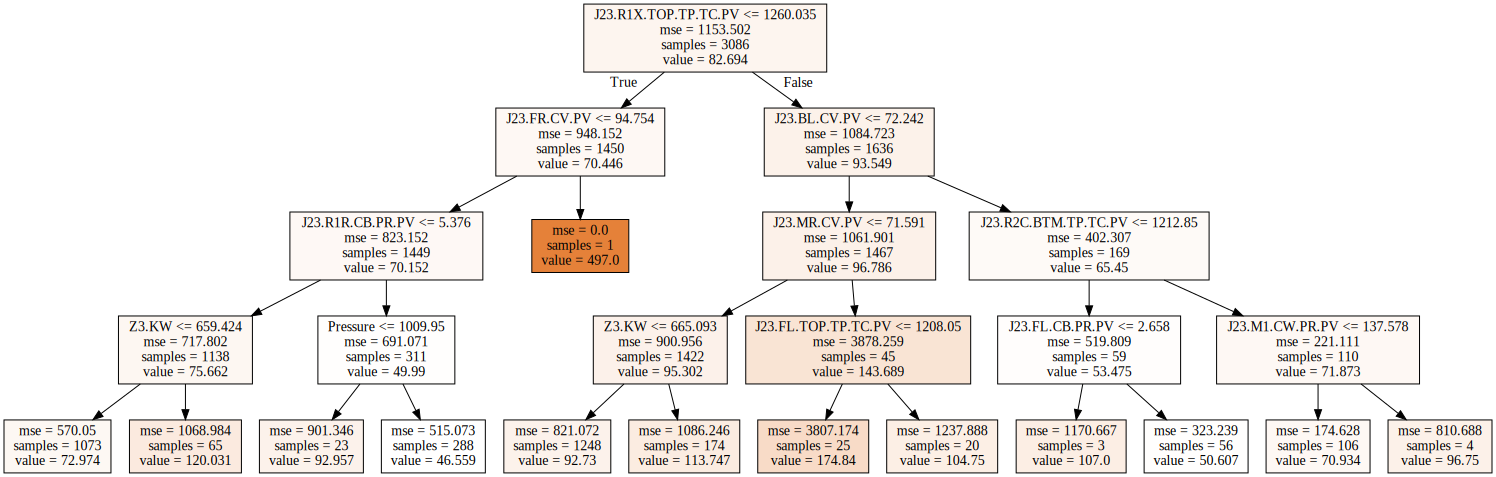

In [79]:
dot_data3 = tree.export_graphviz(treereg, feature_names=list(X_tren.columns.values), filled=True)  
graph = graphviz.Source(dot_data3)  
graph 

In [80]:
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn import tree

In [81]:
mse_list=[]
mse_list.append(5)
mse_list.append(3)
mse_list.append(4)

In [82]:
np.mean(mse_list)

4.0

In [83]:
kfcv = KFold(n_splits=5,shuffle=True)
i=0
rmse_list=[]

for train,test in kfcv.split(dane):
    dectreecv = tree.DecisionTreeRegressor(max_depth=4)
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train])
    
    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(dane.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='drzewo_kfold'+str(i)  
    graph.render(name,view=True)
    i=i+1
    test_pred=dectreecv.predict(dane.iloc[test])
    test_mse=mean_squared_error(dane_y.iloc[test],test_pred)
    rmse=np.sqrt(test_mse)
    print("Błąd mse:",test_mse)
    print("rmse: ",rmse)
    rmse_list.append(rmse)
print("Średni błąd RMSE: ", np.mean(rmse_list))

Błąd mse: 721.4126423272371
rmse:  26.859125866774537
Błąd mse: 803.4500394489419
rmse:  28.34519429195965
Błąd mse: 873.7650186820833
rmse:  29.55951655020906
Błąd mse: 677.5825289578432
rmse:  26.030415458802096
Błąd mse: 1015.1564714401368
rmse:  31.861520231152447
Średni błąd RMSE:  28.53115447977956


In [84]:
tscv = TimeSeriesSplit(n_splits=5)

In [85]:
cvreg = tree.DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(cvreg, X_tren, y_tren,scoring='neg_mean_squared_error', cv=tscv)

In [86]:
scores

array([ -954.49563046,  -819.30492499, -1031.7551026 ,  -904.61700808,
        -809.83359211])

In [87]:
cvreg = tree.DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(cvreg, X_tren, y_tren,scoring='neg_mean_absolute_error', cv=tscv)

In [88]:
scores

array([-21.25278466, -20.76321577, -19.50900446, -22.27664286,
       -22.16887395])

In [89]:
kfcv = KFold(n_splits=5,shuffle=True)

In [90]:
kfcvreg = tree.DecisionTreeRegressor(max_depth=6)
scores = cross_val_score(kfcvreg, dane, dane_y,scoring='neg_mean_squared_error', cv=kfcv)

In [91]:
scores

array([-1006.19497462,  -857.22785553,  -762.10831603,  -701.69787588,
        -759.52590963])

In [92]:
scores.mean()

-817.3509863373499

In [93]:
dataset_labels_binary.describe()

count     3858
unique       2
top          0
freq      1950
Name: FTA$SumDefect.L23, dtype: int64

In [94]:
kfcvclf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(kfcvclf, dane, dataset_labels_binary,scoring='accuracy', cv=kfcv)
scores.mean()

0.711240028762861

In [97]:
kfcvclf = tree.DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(kfcvclf, X_tren, y_bin_tren,scoring='accuracy', cv=kfcv)

In [98]:
scores.mean()

0.682105710374345

In [99]:
kfcv = KFold(n_splits=5)

In [100]:
kfcvclf = tree.DecisionTreeClassifier(max_depth=1)
kfcvclf.fit(dane,dataset_labels_binary)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
kfcvclf = tree.DecisionTreeClassifier(max_depth=6)

In [102]:
kfcvclf.fit(X_tren,y_bin_tren)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
graphs=[]
i=0
dot_data=[]
for train,test in kfcv.split(dane):
    dectreecv = tree.DecisionTreeClassifier(max_depth=3)
    dectreecv.fit(dane.iloc[train], dataset_labels_binary.iloc[train])
    
    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(dane.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='dtreeclfkfs'+str(i)
    graph.render(name,view=True)
    i=i+1

In [108]:
dectreecv = tree.DecisionTreeClassifier(max_depth=3)
dectreecv.fit(dane, dataset_labels_binary)
    
dot_data3=tree.export_graphviz(dectreecv, feature_names=list(dane.columns.values),class_names=['0','1'], filled=True)  
graph=graphviz.Source(dot_data3)
graph.format = 'png'
name='dtreeclfsall1'
graph.render(name,view=True)

'dtreeclfsall1.png'

In [106]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [103]:
graphs=[]
plots=[]
i=0
dot_data=[]
for train,test in kfcv.split(X_tren):
    dectreecv = tree.DecisionTreeRegressor(max_depth=4)
    #print("%s %s" % (train, test))
    #print(train_labels.iloc[train])
    dectreecv.fit(X_tren.iloc[train], y_tren.iloc[train])
    
    
    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(X_tren.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='dddtreekf'+str(i)
    graph.render(name,view=True)
    i=i+1

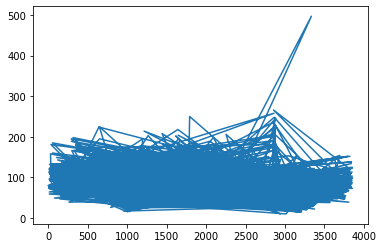

In [104]:
plt.plot(y_tren)

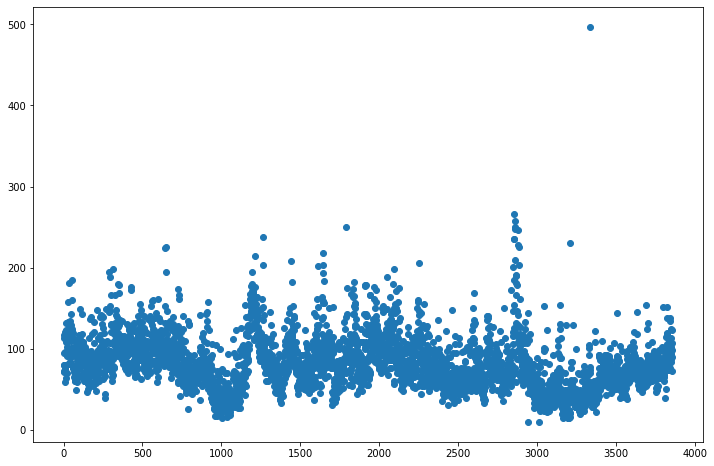

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(list(range(len(dane_y))),dane_y)

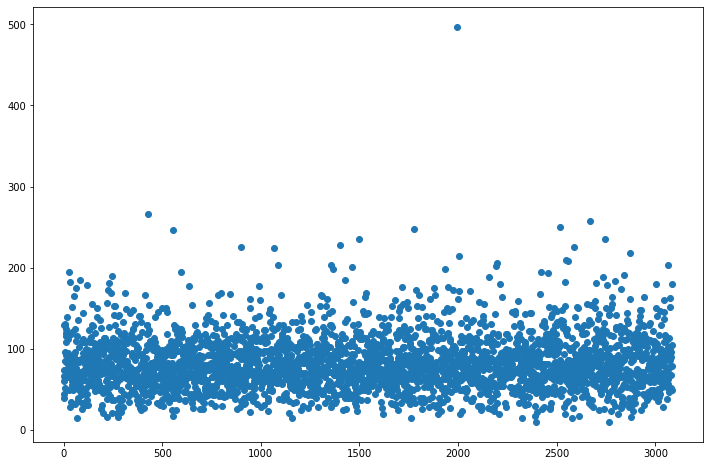

In [109]:
plt.figure(figsize=(12,8))
plt.scatter(list(range(len(y_tren))),y_tren)

In [110]:
y_tren

1679     67
1284     74
675     130
2471     40
1063     44
       ... 
385      96
1194    180
377     105
678      79
3156     50
Name: FTA$SumDefect.L23, Length: 3086, dtype: int64

In [ ]:
#FEATURE IMPORTANCES

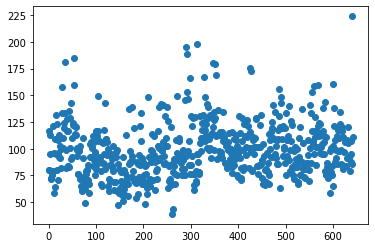

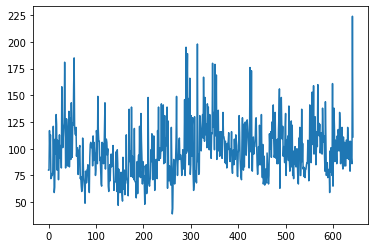

mse 2005.758795534412


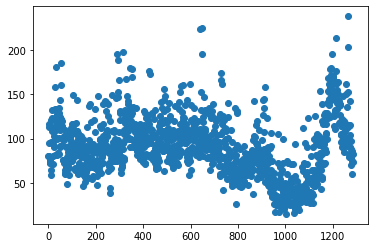

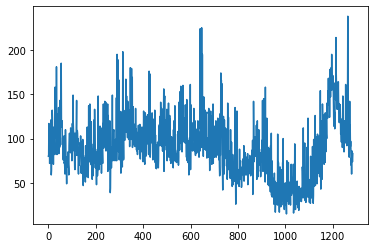

mse 2871.0859207991543


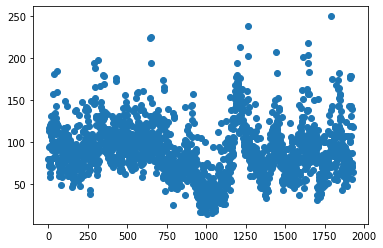

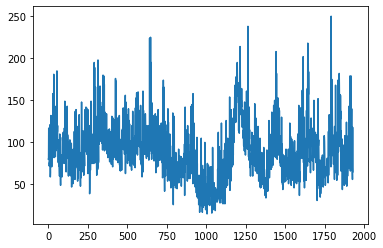

mse 1093.4725396055298


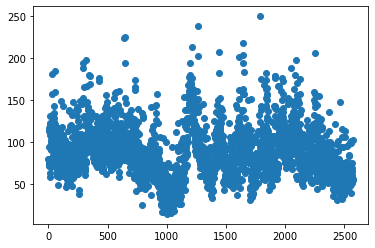

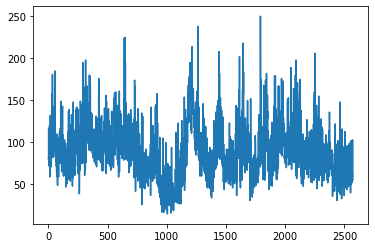

mse 1746.0811212447018


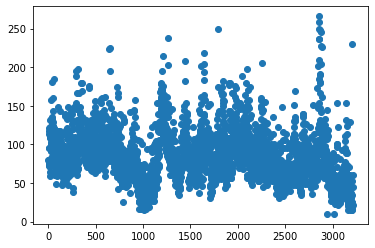

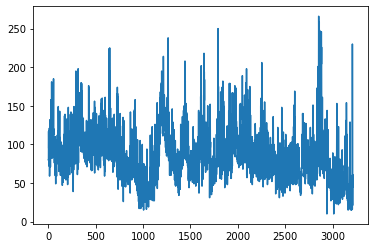

mse 1173.5906793497027


In [112]:
#graphs=[]
#plots=[]
i=0
dot_data=[]
for train,test in tscv.split(dane):
    dectreecv = tree.DecisionTreeRegressor(max_depth=4)
    #print("%s %s" % (train, test))
    #print(train_labels.iloc[train])
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train])
    plt.scatter(list(range(len(dane_y.iloc[train]))),dane_y.iloc[train])
    plt.show()
    plt.plot(dane_y.iloc[train])
    plt.show()
    
    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(X_tren.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='dtreets'+str(i)
    graph.render(name,view=True)
    i=i+1
    test_pred=dectreecv.predict(dane.iloc[test])
    print("mse",mean_squared_error(dane_y.iloc[test],test_pred))

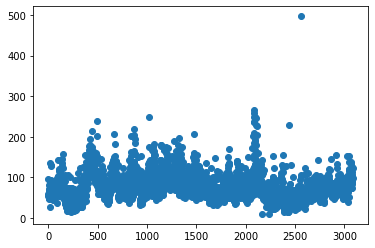

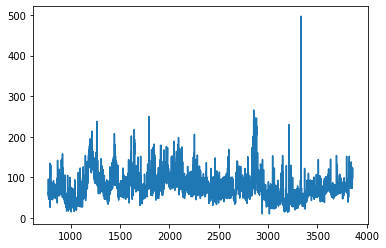

mse 897.3085831194437


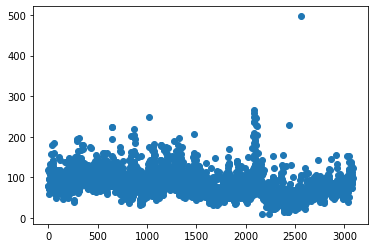

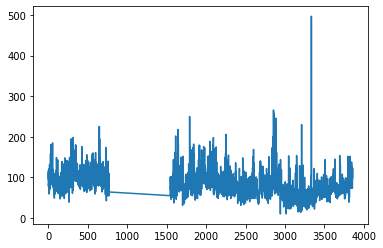

mse 1450.570593344359


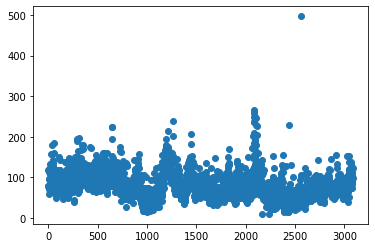

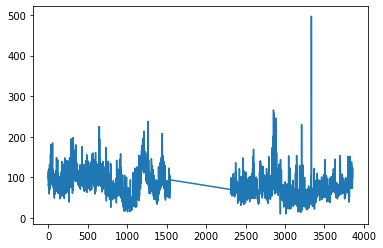

mse 1684.5495245171155


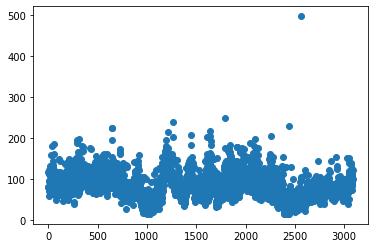

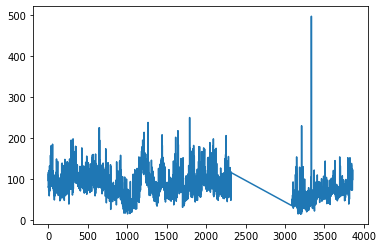

mse 1298.9584932968455


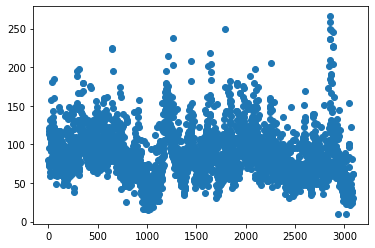

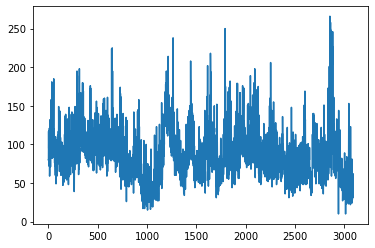

mse 1344.660440905071


In [113]:
#graphs=[]
#plots=[]
kfcv=KFold(n_splits=5,shuffle=False)
i=0
dot_data=[]
for train,test in kfcv.split(dane):
    dectreecv = tree.DecisionTreeRegressor(max_depth=4)
    #print("%s %s" % (train, test))
    #print(train_labels.iloc[train])
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train])
    plt.scatter(list(range(len(dane_y.iloc[train]))),dane_y.iloc[train])
    plt.show()
    plt.plot(dane_y.iloc[train])
    plt.show()

    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(X_tren.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='dtreekf'+str(i)
    graph.render(name,view=True)
    i=i+1
    test_pred=dectreecv.predict(dane.iloc[test])
    print("mse",mean_squared_error(dane_y.iloc[test],test_pred))

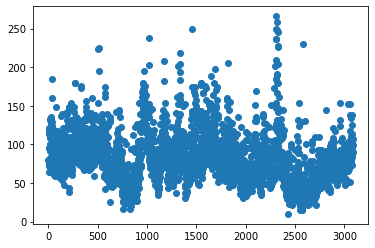

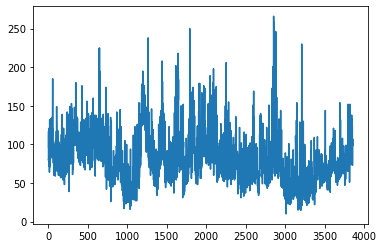

mse 1041.8759801513916


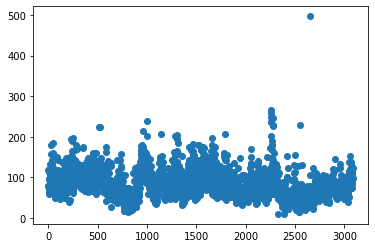

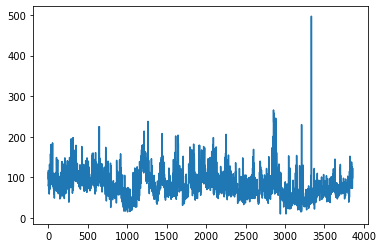

mse 825.516765447043


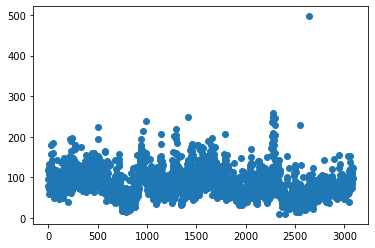

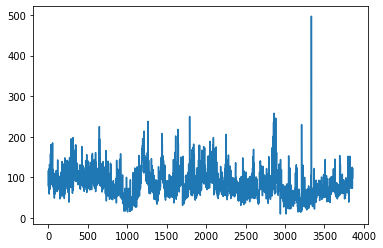

mse 716.4146742446426


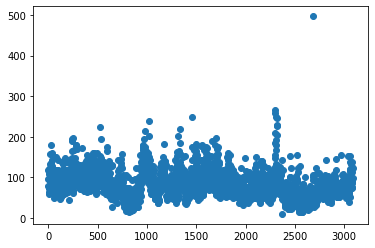

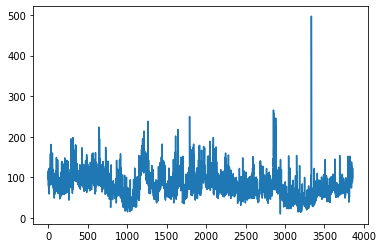

mse 908.9787492898886


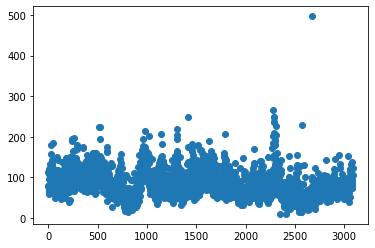

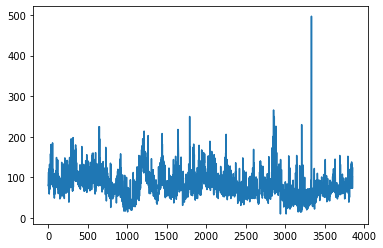

mse 788.2397863376401


In [114]:
#SHUFFLE
#graphs=[]
#plots=[]
kfcv=KFold(n_splits=5,shuffle=True)
i=0
dot_data=[]
for train,test in kfcv.split(dane):
    dectreecv = tree.DecisionTreeRegressor(max_depth=4)
    #print("%s %s" % (train, test))
    #print(train_labels.iloc[train])
    dectreecv.fit(dane.iloc[train], dane_y.iloc[train])
    plt.scatter(list(range(len(dane_y.iloc[train]))),dane_y.iloc[train])
    plt.show()
    plt.plot(dane_y.iloc[train])
    plt.show()
    
    dot_data3=tree.export_graphviz(dectreecv, feature_names=list(X_tren.columns.values), filled=True)  
    graph=graphviz.Source(dot_data3)
    graph.format = 'png'
    name='dtreekfshuf'+str(i)
    graph.render(name,view=True)
    i=i+1
    test_pred=dectreecv.predict(dane.iloc[test])
    print("mse",mean_squared_error(dane_y.iloc[test],test_pred))